# Imports

In [1]:
import pandas as pd
import numpy as np
import mne
from matplotlib import pyplot as plt

In [2]:
# import ccs_eeg_utils
import sys
sys.path.insert(0,'..')
import ccs_eeg_utils

# Load data & plot continuous EEG

In [3]:
# Load the data
from mne_bids import (BIDSPath,read_raw_bids)

# path where to save the datasets.
bids_root = "Dataset/ds004147"
subject_id = '27' # used first in list to test


bids_path = BIDSPath(subject=subject_id,task="casinos",
                     datatype='eeg', suffix='eeg',
                     root=bids_root)

# read the file
raw = read_raw_bids(bids_path)
# fix the annotations readin
ccs_eeg_utils.read_annotations_core(bids_path,raw)

Extracting parameters from Dataset\ds004147\sub-27\eeg\sub-27_task-casinos_eeg.vhdr...
Setting channel info structure...
Reading events from Dataset\ds004147\sub-27\eeg\sub-27_task-casinos_events.tsv.
The event "Stimulus" refers to multiple event values. Creating hierarchical event names.
    Renaming event: Stimulus -> Stimulus/S  1
    Renaming event: Stimulus -> Stimulus/S  2
    Renaming event: Stimulus -> Stimulus/S  3
    Renaming event: Stimulus -> Stimulus/S  4
    Renaming event: Stimulus -> Stimulus/S  7
    Renaming event: Stimulus -> Stimulus/S  1
    Renaming event: Stimulus -> Stimulus/S  2
    Renaming event: Stimulus -> Stimulus/S  3
    Renaming event: Stimulus -> Stimulus/S  5
    Renaming event: Stimulus -> Stimulus/S  7
    Renaming event: Stimulus -> Stimulus/S  1
    Renaming event: Stimulus -> Stimulus/S  2
    Renaming event: Stimulus -> Stimulus/S  3
    Renaming event: Stimulus -> Stimulus/S  4
    Renaming event: Stimulus -> Stimulus/S  7
    Renaming event: 

In [4]:
raw.load_data()

Reading 0 ... 3161619  =      0.000 ...  3161.619 secs...


Measurement date,"March 18, 2022 13:52:02 GMT"
Experimenter,Unknown
Participant,sub-27
Digitized points,Not available
Good channels,31 EEG
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,1000.00 Hz
Highpass,0.00 Hz
Lowpass,280.00 Hz


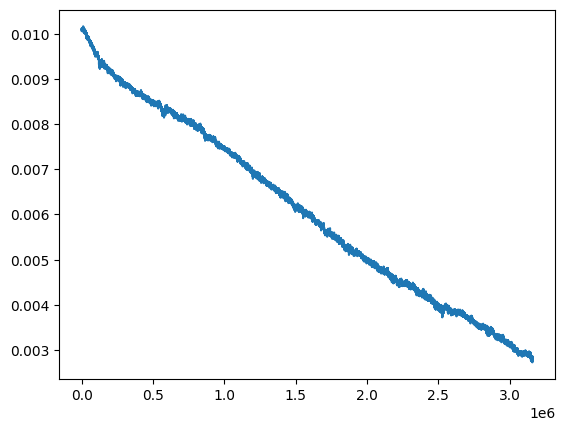

In [5]:
plt.plot(raw[10,:][0].T)

# Epoching

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


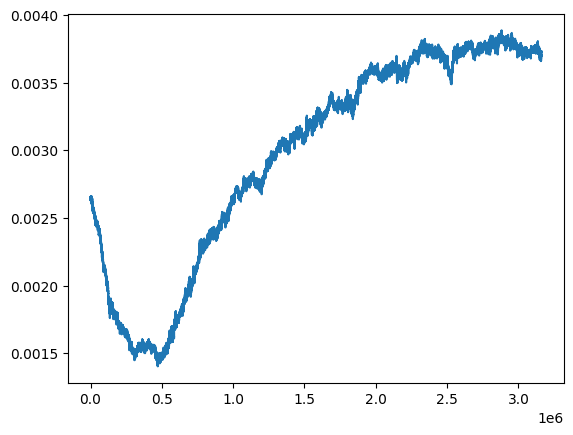

In [6]:
raw.pick_channels(["FCz"])
plt.plot(raw[:,:][0].T)

In [7]:
# convert annotations to events
evts,evts_dict = mne.events_from_annotations(raw)

Used Annotations descriptions: ['Comment:Active Shielding: On', 'Stimulus:S  1', 'Stimulus:S  2', 'Stimulus:S  3', 'Stimulus:S  4', 'Stimulus:S  5', 'Stimulus:S  6', 'Stimulus:S  7', 'Stimulus:S 11', 'Stimulus:S 12', 'Stimulus:S 13', 'Stimulus:S 14', 'Stimulus:S 15', 'Stimulus:S 16', 'Stimulus:S 17', 'Stimulus:S 21', 'Stimulus:S 22', 'Stimulus:S 23', 'Stimulus:S 24', 'Stimulus:S 25', 'Stimulus:S 26', 'Stimulus:S 27', 'Stimulus:S 31', 'Stimulus:S 32', 'Stimulus:S 33', 'Stimulus:S 34', 'Stimulus:S 35', 'Stimulus:S 36', 'Stimulus:S 37']


In [8]:
# get all keys which contain "stimulus"
wanted_keys = [e for e in evts_dict.keys() if "Stimulus" in e]
wanted_keys

['Stimulus:S  1',
 'Stimulus:S  2',
 'Stimulus:S  3',
 'Stimulus:S  4',
 'Stimulus:S  5',
 'Stimulus:S  6',
 'Stimulus:S  7',
 'Stimulus:S 11',
 'Stimulus:S 12',
 'Stimulus:S 13',
 'Stimulus:S 14',
 'Stimulus:S 15',
 'Stimulus:S 16',
 'Stimulus:S 17',
 'Stimulus:S 21',
 'Stimulus:S 22',
 'Stimulus:S 23',
 'Stimulus:S 24',
 'Stimulus:S 25',
 'Stimulus:S 26',
 'Stimulus:S 27',
 'Stimulus:S 31',
 'Stimulus:S 32',
 'Stimulus:S 33',
 'Stimulus:S 34',
 'Stimulus:S 35',
 'Stimulus:S 36',
 'Stimulus:S 37']

In [9]:
# subset the large event-dictionairy
evts_dict_stim=dict((k, evts_dict[k]) for k in wanted_keys if k in evts_dict)
evts_dict_stim

{'Stimulus:S  1': 10002,
 'Stimulus:S  2': 10003,
 'Stimulus:S  3': 10004,
 'Stimulus:S  4': 10005,
 'Stimulus:S  5': 10006,
 'Stimulus:S  6': 10007,
 'Stimulus:S  7': 10008,
 'Stimulus:S 11': 10009,
 'Stimulus:S 12': 10010,
 'Stimulus:S 13': 10011,
 'Stimulus:S 14': 10012,
 'Stimulus:S 15': 10013,
 'Stimulus:S 16': 10014,
 'Stimulus:S 17': 10015,
 'Stimulus:S 21': 10016,
 'Stimulus:S 22': 10017,
 'Stimulus:S 23': 10018,
 'Stimulus:S 24': 10019,
 'Stimulus:S 25': 10020,
 'Stimulus:S 26': 10021,
 'Stimulus:S 27': 10022,
 'Stimulus:S 31': 10023,
 'Stimulus:S 32': 10024,
 'Stimulus:S 33': 10025,
 'Stimulus:S 34': 10026,
 'Stimulus:S 35': 10027,
 'Stimulus:S 36': 10028,
 'Stimulus:S 37': 10029}

In [10]:
# epoch the data
# param 'detrend': If 0 or 1, the data channels (MEG and EEG) will be detrended when loaded. 
# 0 is a constant (DC) detrend, 1 is a linear detrend. None is no detrending.
epochs = mne.Epochs(raw,evts,evts_dict_stim,tmin=-0.1,tmax=1,detrend=1)
epochs

Not setting metadata
1420 matching events found
Setting baseline interval to [-0.1, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated


Number of events,1420
Events,Stimulus:S 1: 94Stimulus:S 2: 94Stimulus:S 3: 94Stimulus:S 4: 43Stimulus:S 5: 51Stimulus:S 6: 54Stimulus:S 7: 40Stimulus:S 11: 45Stimulus:S 12: 45Stimulus:S 13: 45Stimulus:S 14: 33Stimulus:S 15: 12Stimulus:S 16: 23Stimulus:S 17: 22Stimulus:S 21: 50Stimulus:S 22: 50Stimulus:S 23: 50Stimulus:S 24: 20Stimulus:S 25: 30Stimulus:S 26: 30Stimulus:S 27: 20Stimulus:S 31: 95Stimulus:S 32: 95Stimulus:S 33: 95Stimulus:S 34: 47Stimulus:S 35: 48Stimulus:S 36: 54Stimulus:S 37: 41
Time range,-0.100 – 1.000 s
Baseline,-0.100 – 0.000 s


## average plot

In [11]:
epochs.average().get_data().shape

(1, 1101)

Need more than one channel to make topography for eeg. Disabling interactivity.


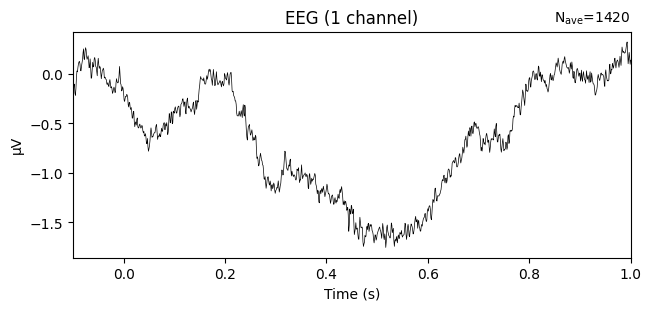

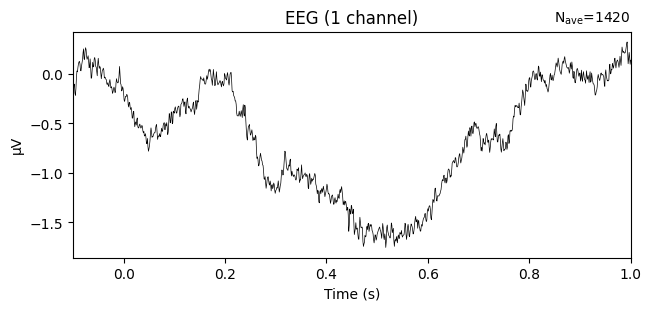

In [12]:
epochs.average().plot()

# trying detrending params

Not setting metadata
1420 matching events found
Setting baseline interval to [-0.1, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Need more than one channel to make topography for eeg. Disabling interactivity.


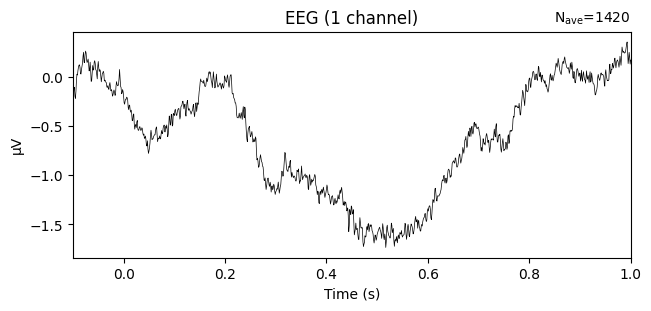

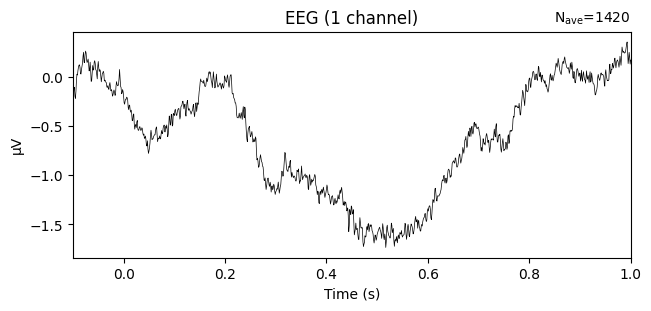

In [13]:
epochs2 = mne.Epochs(raw,evts,evts_dict_stim,tmin=-0.1,tmax=1,detrend=0)
epochs2
epochs2.average().plot()

Not setting metadata
1420 matching events found
Setting baseline interval to [-0.1, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Need more than one channel to make topography for eeg. Disabling interactivity.


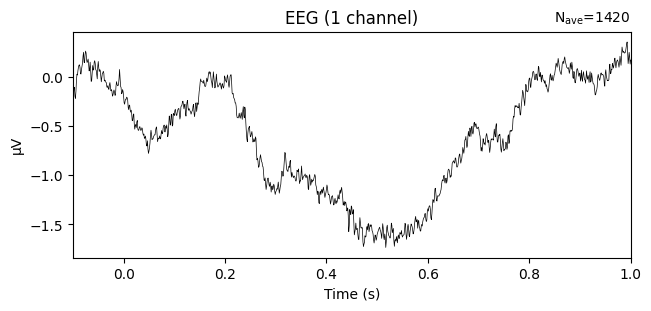

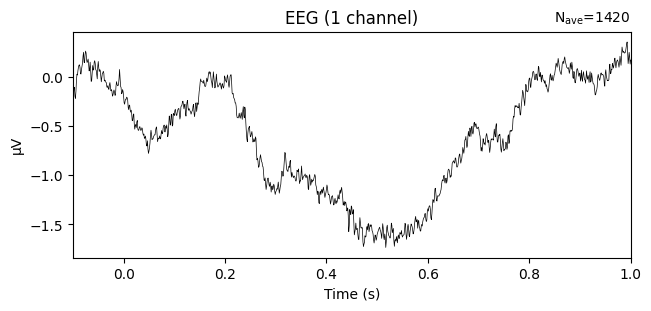

In [14]:
epochs3 = mne.Epochs(raw,evts,evts_dict_stim,tmin=-0.1,tmax=1,detrend=None)
epochs3
epochs3.average().plot()

## plot all

Using data from preloaded Raw for 1420 events and 1101 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1420 events and 1101 original time points ...


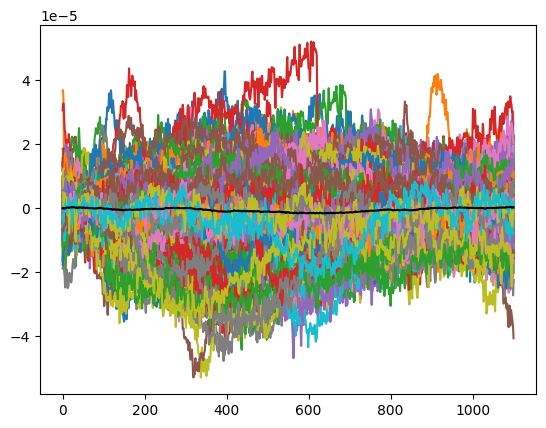

In [15]:
plt.plot(np.squeeze(epochs.get_data()[:,0,:].T))
plt.plot(np.squeeze(epochs.get_data()[:,0,:].T).mean(axis=1), color="black")

In [16]:
target = ["Stimulus:{}{}".format(k,k) for k in [1,2,3,4,5]]
distractor = ["Stimulus:{}{}".format(k,j) for k in [1,2,3,4,5] for j in [1,2,3,4,5] if k!=j]

Need more than one channel to make topography for eeg. Disabling interactivity.


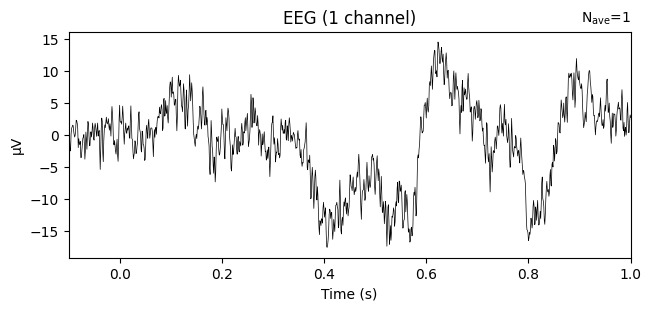

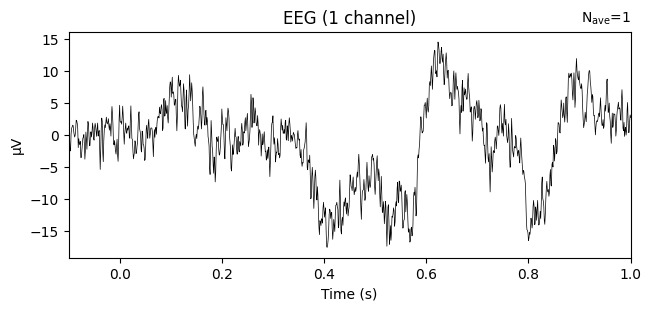

In [17]:
evoked = epochs[1].average()
evoked.plot()

Need more than one channel to make topography for eeg. Disabling interactivity.


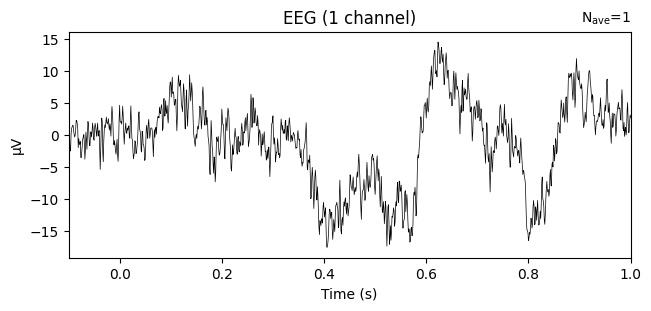

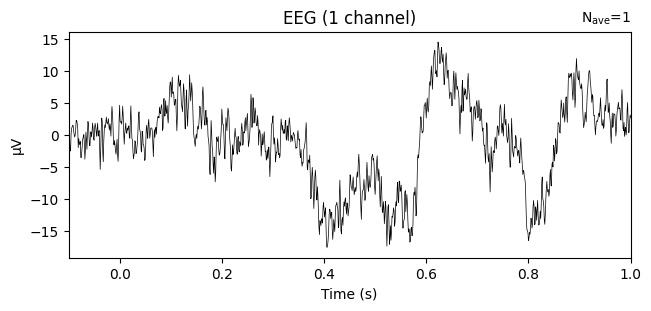

In [18]:
evoked = epochs2[1].average()
evoked.plot()

Need more than one channel to make topography for eeg. Disabling interactivity.


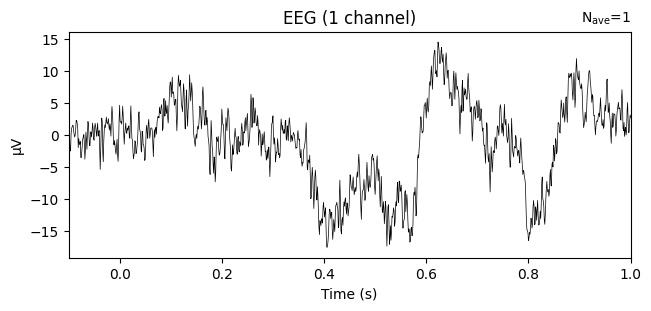

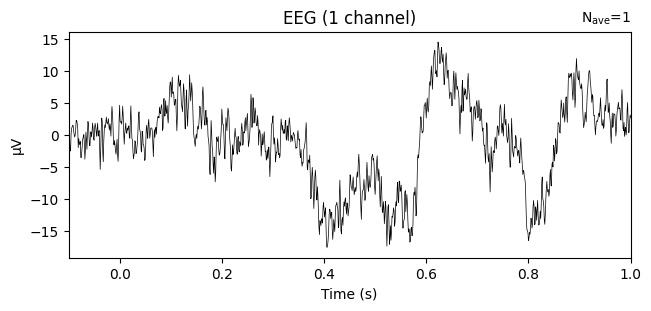

In [19]:
evoked = epochs3[1].average()
evoked.plot()

C:\Users\Max\AppData\Local\Temp\ipykernel_8776\4180620594.py:3: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  mne.viz.plot_compare_evokeds([evokedA,evokedB])


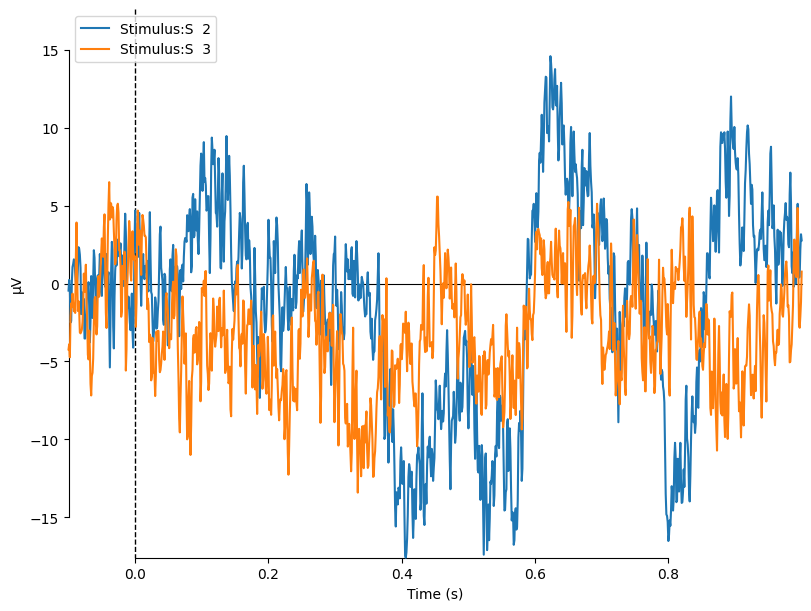

[<Figure size 800x600 with 1 Axes>]

In [20]:
evokedA = epochs[1].average()
evokedB = epochs[2].average()
mne.viz.plot_compare_evokeds([evokedA,evokedB])